In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats;
import seaborn as sns;

In [50]:
df =pd.read_csv("DS - Part2 - Basketball.csv")

# Valiate Data Set 

In [51]:
df.shape
#61 Rows 13 Columnns 

(61, 13)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Team                 61 non-null     object
 1   Tournament           61 non-null     int64 
 2   Score                61 non-null     object
 3   PlayedGames          61 non-null     object
 4   WonGames             61 non-null     object
 5   DrawnGames           61 non-null     object
 6   LostGames            61 non-null     object
 7   BasketScored         61 non-null     object
 8   BasketGiven          61 non-null     object
 9   TournamentChampion   61 non-null     object
 10  Runner-up            61 non-null     object
 11  TeamLaunch           61 non-null     object
 12  HighestPositionHeld  61 non-null     int64 
dtypes: int64(2), object(11)
memory usage: 6.3+ KB


In [53]:
df.columns

Index(['Team', 'Tournament', 'Score', 'PlayedGames', 'WonGames', 'DrawnGames',
       'LostGames', 'BasketScored', 'BasketGiven', 'TournamentChampion',
       'Runner-up', 'TeamLaunch', 'HighestPositionHeld'],
      dtype='object')

In [54]:
df.head(10)

Team  Tournament Score PlayedGames WonGames DrawnGames LostGames  \
0   Team 1          86  4385        2762     1647        552       563   
1   Team 2          86  4262        2762     1581        573       608   
2   Team 3          80  3442        2614     1241        598       775   
3   Team 4          82  3386        2664     1187        616       861   
4   Team 5          86  3368        2762     1209        633       920   
5   Team 6          73  2819        2408      990        531       887   
6   Team 7          82  2792        2626      948        608      1070   
7   Team 8          70  2573        2302      864        577       861   
8   Team 9          58  2109        1986      698        522       766   
9  Team 10          51  1884        1728      606        440       682   

  BasketScored BasketGiven TournamentChampion Runner-up TeamLaunch  \
0         5947        3140                 33        23       1929   
1         5900        3114                 25        25       1929   
2         4534        3309                 10         8       1929   
3         4398        3469                  6         6   1931to32   
4         4631        3700                  8         7       1929   
5         3680        3373                  1         4    1934-35   
6         3609        3889                  -         -       1929   
7         3228        3230                  2         3       1929   
8         2683        2847                  -         1    1939-40   
9         2159        2492                  1         -    1932-33   

   HighestPositionHeld  
0                    1  
1                    1  
2                    1  
3                    1  
4                    1  
5                    1  
6                    3  
7                    1  
8                    2  
9                    1

In [55]:
df.head()

Team  Tournament Score PlayedGames WonGames DrawnGames LostGames  \
0  Team 1          86  4385        2762     1647        552       563   
1  Team 2          86  4262        2762     1581        573       608   
2  Team 3          80  3442        2614     1241        598       775   
3  Team 4          82  3386        2664     1187        616       861   
4  Team 5          86  3368        2762     1209        633       920   

  BasketScored BasketGiven TournamentChampion Runner-up TeamLaunch  \
0         5947        3140                 33        23       1929   
1         5900        3114                 25        25       1929   
2         4534        3309                 10         8       1929   
3         4398        3469                  6         6   1931to32   
4         4631        3700                  8         7       1929   

   HighestPositionHeld  
0                    1  
1                    1  
2                    1  
3                    1  
4                    1

# Data Cleansing & Preparation 

In [56]:
df.isnull().sum()

Team                   0
Tournament             0
Score                  0
PlayedGames            0
WonGames               0
DrawnGames             0
LostGames              0
BasketScored           0
BasketGiven            0
TournamentChampion     0
Runner-up              0
TeamLaunch             0
HighestPositionHeld    0
dtype: int64

In [57]:
df.duplicated().sum()

0

Observation : No duplicate or null in data set 

In [58]:
df.tail(10)

Team  Tournament Score PlayedGames WonGames DrawnGames LostGames  \
51  Team 52           4    56          72       21         14        37   
52  Team 53           2    52          68       17         18        33   
53  Team 54           3    42          54       18          6        30   
54  Team 55           2    40          68       13         14        41   
55  Team 56           1    35          38        8         11        19   
56  Team 57           1    34          38        8         10        20   
57  Team 58           1    22          30        7          8        15   
58  Team 59           1    19          30        7          5        18   
59  Team 60           1    14          30        5          4        21   
60  Team 61           1     -           -        -          -         -   

   BasketScored BasketGiven TournamentChampion Runner-up TeamLaunch  \
51          153         184                  -         -       1929   
52           71         116                  -         -    1979-80   
53           97         131                  -         -       1929   
54           70         182                  -         -    1950-51   
55           36          55                  -         -    2016_17   
56           38          66                  -         -    2009-10   
57           37          57                  -         -    1956-57   
58           51          85                  -         -    1951~52   
59           34          65                  -         -    1955-56   
60            -           -                  -         -    2017~18   

    HighestPositionHeld  
51                    6  
52                   10  
53                    8  
54                   16  
55                   17  
56                   20  
57                   16  
58                   16  
59                   15  
60                    9

# Observatios in Data : 
There is a special character in data i.e '_'. We should eliminate this missing value.
TeamLaunch year need not be interval field we can take by default first year as Team Launch year to make data simple
Most of the columns are Objects , but values in integers so we can do type conversion
Last Row doesn't have most of attributes so drop that records for EDA

In [59]:
df_data=df.copy(deep=True)
df.rename(columns = {'Runner-up': 'Runnerup'}, inplace = True)
df=df.replace('-',0);
df['TeamLaunch'] = df_data['TeamLaunch'].str.slice(0,4);
columns = df.columns.drop('Team');
df[columns] = df[columns].apply(pd.to_numeric, errors='coerce')
df.drop(60,inplace=True)
df.tail(10)

Team  Tournament  Score  PlayedGames  WonGames  DrawnGames  LostGames  \
50  Team 51           3     71           90        29          13         48   
51  Team 52           4     56           72        21          14         37   
52  Team 53           2     52           68        17          18         33   
53  Team 54           3     42           54        18           6         30   
54  Team 55           2     40           68        13          14         41   
55  Team 56           1     35           38         8          11         19   
56  Team 57           1     34           38         8          10         20   
57  Team 58           1     22           30         7           8         15   
58  Team 59           1     19           30         7           5         18   
59  Team 60           1     14           30         5           4         21   

    BasketScored  BasketGiven  TournamentChampion  Runnerup  TeamLaunch  \
50           121          183                   0         0        1953   
51           153          184                   0         0        1929   
52            71          116                   0         0        1979   
53            97          131                   0         0        1929   
54            70          182                   0         0        1950   
55            36           55                   0         0        2016   
56            38           66                   0         0        2009   
57            37           57                   0         0        1956   
58            51           85                   0         0        1951   
59            34           65                   0         0        1955   

    HighestPositionHeld  
50                   14  
51                    6  
52                   10  
53                    8  
54                   16  
55                   17  
56                   20  
57                   16  
58                   16  
59                   15

# Statistical analysis

In [60]:
df.describe()

Tournament        Score  PlayedGames     WonGames  DrawnGames  \
count   60.000000    60.000000    60.000000    60.000000   60.000000   
mean    24.383333   916.450000   810.100000   309.033333  192.083333   
std     26.884620  1138.342899   877.465393   408.481395  201.985508   
min      1.000000    14.000000    30.000000     5.000000    4.000000   
25%      4.000000   104.250000   115.500000    34.750000   26.250000   
50%     12.000000   395.500000   424.500000   124.000000   98.500000   
75%     39.000000  1360.500000  1345.500000   432.750000  331.500000   
max     86.000000  4385.000000  2762.000000  1647.000000  633.000000   

         LostGames  BasketScored  BasketGiven  TournamentChampion   Runnerup  \
count    60.000000     60.000000    60.000000            60.00000  60.000000   
mean    308.816667   1159.350000  1159.233333             1.45000   1.433333   
std     294.508639   1512.063948  1163.946914             5.51554   4.574679   
min      15.000000     34.000000    55.000000             0.00000   0.000000   
25%      62.750000    154.500000   236.000000             0.00000   0.000000   
50%     197.500000    444.000000   632.500000             0.00000   0.000000   
75%     563.500000   1669.750000  2001.250000             0.00000   0.000000   
max    1070.000000   5947.000000  3889.000000            33.00000  25.000000   

        TeamLaunch  HighestPositionHeld  
count    60.000000            60.000000  
mean   1957.950000             7.050000  
std      26.646732             5.315232  
min    1929.000000             1.000000  
25%    1934.750000             3.000000  
50%    1950.500000             6.000000  
75%    1977.250000            10.000000  
max    2016.000000            20.000000

# Univariate Analysis

In [61]:
df.skew()

/var/folders/7p/5k1s0qxj2mn1kmk2d_npxq8r0000gn/T/ipykernel_9288/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Tournament             1.197176
Score                  1.574104
PlayedGames            1.123454
WonGames               1.786067
DrawnGames             0.984899
LostGames              0.880596
BasketScored           1.758058
BasketGiven            0.958164
TournamentChampion     4.734845
Runnerup               4.321794
TeamLaunch             0.682570
HighestPositionHeld    0.832164
dtype: float64

Observation : Positively skewed: Most frequent values are low and tail is towards high values.

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


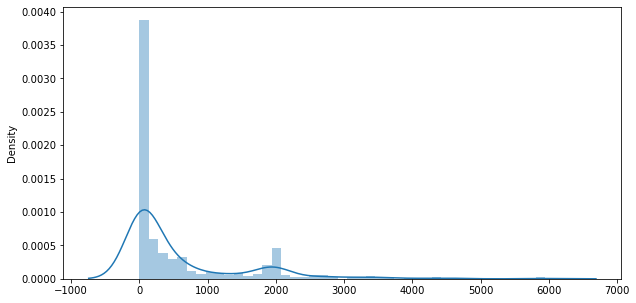

In [62]:
plt.figure(figsize=(10,5))

columns = df.columns.drop('Team');
dflist = df[columns];
sns.distplot(dflist);
plt.show()

Histogram for checking the Skewness(RightSkewed or Postively Skewed)

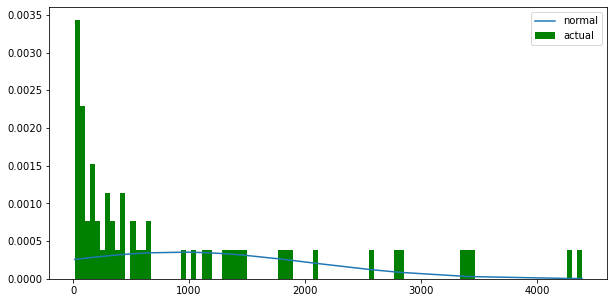

In [63]:
plt.figure(figsize=(10,5))
h=np.asarray(df['Score']);

fit=stats.norm.pdf(h,np.mean(h),np.std(h))
plt.plot(h,fit,label='normal')
plt.hist(h,bins=100,density = True,color='g', label='actual')
plt.legend()
plt.show()

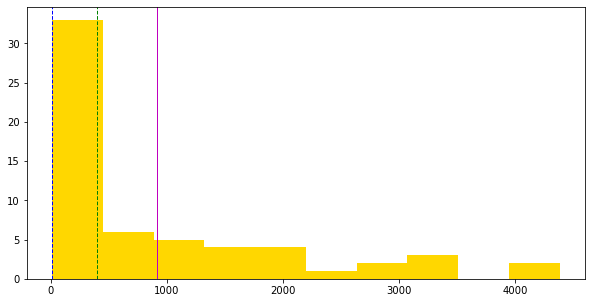

In [64]:
plt.figure(figsize=(10,5))
plt.hist(df.Score, color='gold') ;# plots a simple histogram
plt.axvline(df.Score.mean(), color='m', linewidth=1)
plt.axvline(df.Score.median(), color='g', linestyle='dashed', linewidth=1)
plt.axvline(df.Score.mode()[0], color='b', linestyle='dashed', linewidth=1);

Statitcs Output - Objservations 

1.A bulk of the observations lie within the first bin out of 10 bins(almost 36 teams out of 61). Most of them got the score betwen 0 to 500
2.there are very few teams got more than 4000 approximatel 3 teams, generally we take them as outliers.
3.We can see from the above figure that the mode and the mean are not very close to each other and that the median is lower than both.
4.There are few teams whose score is more than 1500.
5.We dont have any team whose score is 3500 to 4000

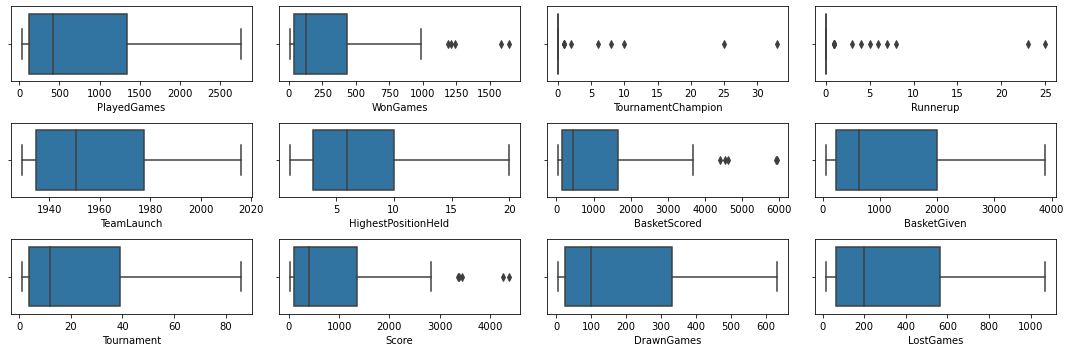

In [65]:
fig, ax = plt.subplots(3, 4)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.boxplot(x=df['PlayedGames'],ax=ax[0][0]);
sns.boxplot(x=df['WonGames'],ax=ax[0][1]);
sns.boxplot(x=df['TournamentChampion'],ax=ax[0][2]);
sns.boxplot(x=df['Runnerup'],ax=ax[0][3]);

sns.boxplot(x=df['TeamLaunch'],ax=ax[1][0]);
sns.boxplot(x=df['HighestPositionHeld'],ax=ax[1][1]);
sns.boxplot(x=df['BasketScored'],ax=ax[1][2]);
sns.boxplot(x=df['BasketGiven'],ax=ax[1][3]);

sns.boxplot(x=df['Tournament'],ax=ax[2][0]);
sns.boxplot(x=df['Score'],ax=ax[2][1]);
sns.boxplot(x=df['DrawnGames'],ax=ax[2][2]);
sns.boxplot(x=df['LostGames'],ax=ax[2][3]);
fig.tight_layout() 
plt.show()

Observations : 
Score,BasketScored,WonGames So we see same kind of box plot result. There are outliers.
TournamentChampion and RunnerUP dont have box at all because as we seen above in describe() 75% data has value as Zero. Remaining are outliers.
if we see IQR of columns, Most of the columns has more values are scattered between median and Upper Quartile . So there is right skeweness in data

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TeamLaunch', ylabel='Density'>

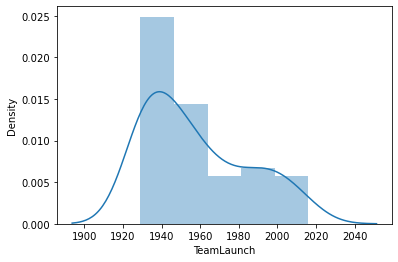

In [66]:
sns.distplot(df.TeamLaunch)

In [ ]:
Observation : categorize data set based on team launch

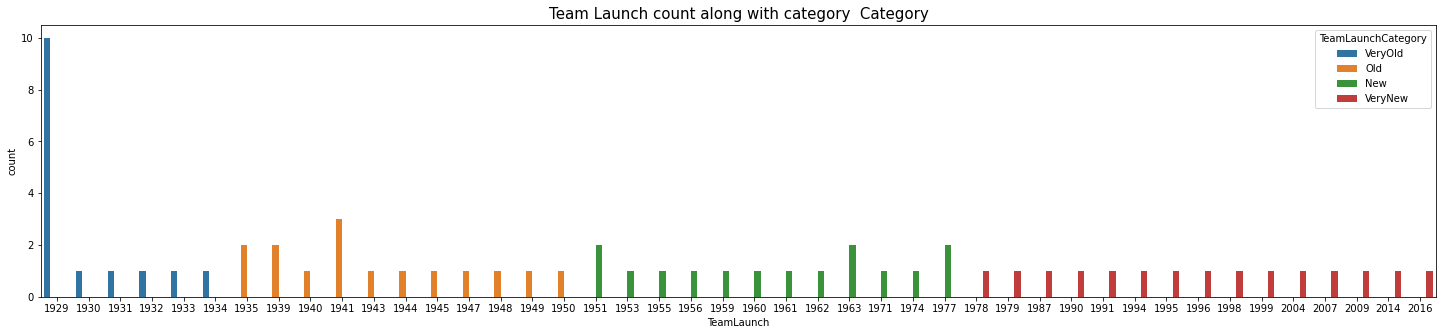

In [67]:
df['TeamLaunchCategory'] = (pd.qcut(df['TeamLaunch'], 4, labels=['VeryOld', 'Old', 'New', 'VeryNew']));


plt.figure(figsize=(25,5))
sns.countplot(x='TeamLaunch',hue='TeamLaunchCategory',data = df)
plt.title("Team Launch count along with category  Category",size=15)
plt.show()

# Multivariate Analysis

In [68]:
df.corr()

Tournament     Score  PlayedGames  WonGames  DrawnGames  \
Tournament             1.000000  0.981258     0.998683  0.971749    0.989295   
Score                  0.981258  1.000000     0.979687  0.997232    0.958090   
PlayedGames            0.998683  0.979687     1.000000  0.967486    0.993972   
WonGames               0.971749  0.997232     0.967486  1.000000    0.939416   
DrawnGames             0.989295  0.958090     0.993972  0.939416    1.000000   
LostGames              0.949350  0.878780     0.955925  0.851436    0.972786   
BasketScored           0.974867  0.996634     0.969970  0.999312    0.942234   
BasketGiven            0.987781  0.943801     0.990020  0.925745    0.992479   
TournamentChampion     0.589304  0.715014     0.575072  0.752904    0.503378   
Runnerup               0.645924  0.764819     0.633101  0.797849    0.566021   
TeamLaunch            -0.599166 -0.538542    -0.581243 -0.540421   -0.570175   
HighestPositionHeld   -0.708002 -0.669215    -0.711065 -0.647819   -0.720248   

                     LostGames  BasketScored  BasketGiven  TournamentChampion  \
Tournament            0.949350      0.974867     0.987781            0.589304   
Score                 0.878780      0.996634     0.943801            0.715014   
PlayedGames           0.955925      0.969970     0.990020            0.575072   
WonGames              0.851436      0.999312     0.925745            0.752904   
DrawnGames            0.972786      0.942234     0.992479            0.503378   
LostGames             1.000000      0.857843     0.985041            0.324025   
BasketScored          0.857843      1.000000     0.931079            0.743847   
BasketGiven           0.985041      0.931079     1.000000            0.471618   
TournamentChampion    0.324025      0.743847     0.471618            1.000000   
Runnerup              0.391645      0.791041     0.533448            0.971533   
TeamLaunch           -0.591571     -0.550150    -0.608902           -0.286768   
HighestPositionHeld  -0.726172     -0.648672    -0.727323           -0.304307   

                     Runnerup  TeamLaunch  HighestPositionHeld  
Tournament           0.645924   -0.599166            -0.708002  
Score                0.764819   -0.538542            -0.669215  
PlayedGames          0.633101   -0.581243            -0.711065  
WonGames             0.797849   -0.540421            -0.647819  
DrawnGames           0.566021   -0.570175            -0.720248  
LostGames            0.391645   -0.591571            -0.726172  
BasketScored         0.791041   -0.550150            -0.648672  
BasketGiven          0.533448   -0.608902            -0.727323  
TournamentChampion   0.971533   -0.286768            -0.304307  
Runnerup             1.000000   -0.317250            -0.359191  
TeamLaunch          -0.317250    1.000000             0.599679  
HighestPositionHeld -0.359191    0.599679             1.000000

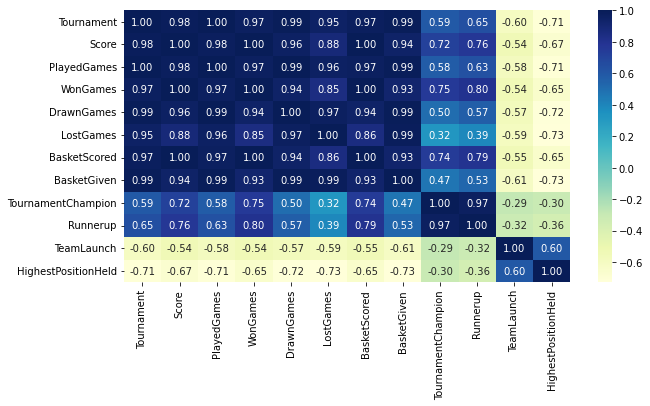

In [69]:
plt.figure(figsize=(10,5))
corrmat = df.corr(method='pearson')
sns.heatmap(corrmat, cmap="YlGnBu", fmt='.2f',annot=True)
plt.show();

Score,WonGames ,Baskets Scored correlation value is 1. So its a perfect positive correlation.
PlayedGames and Tournmanet correlation value is 1. So its a perfect positive correlation.
Other than TeamLaunch and HighestPositionHeld remaining all fields are positively correlated.
TeamLaunch is negatively correlated means for old teams given values are more and for new teams its low.
PlayedGames and Drawn Games correlation is 0.99 , it means most of the games are Drawn compared to win/lost .
TournmentChampion and Runnerup are the counts . So we see 30% to 70% correlation with other fields.

<Figure size 720x360 with 0 Axes>

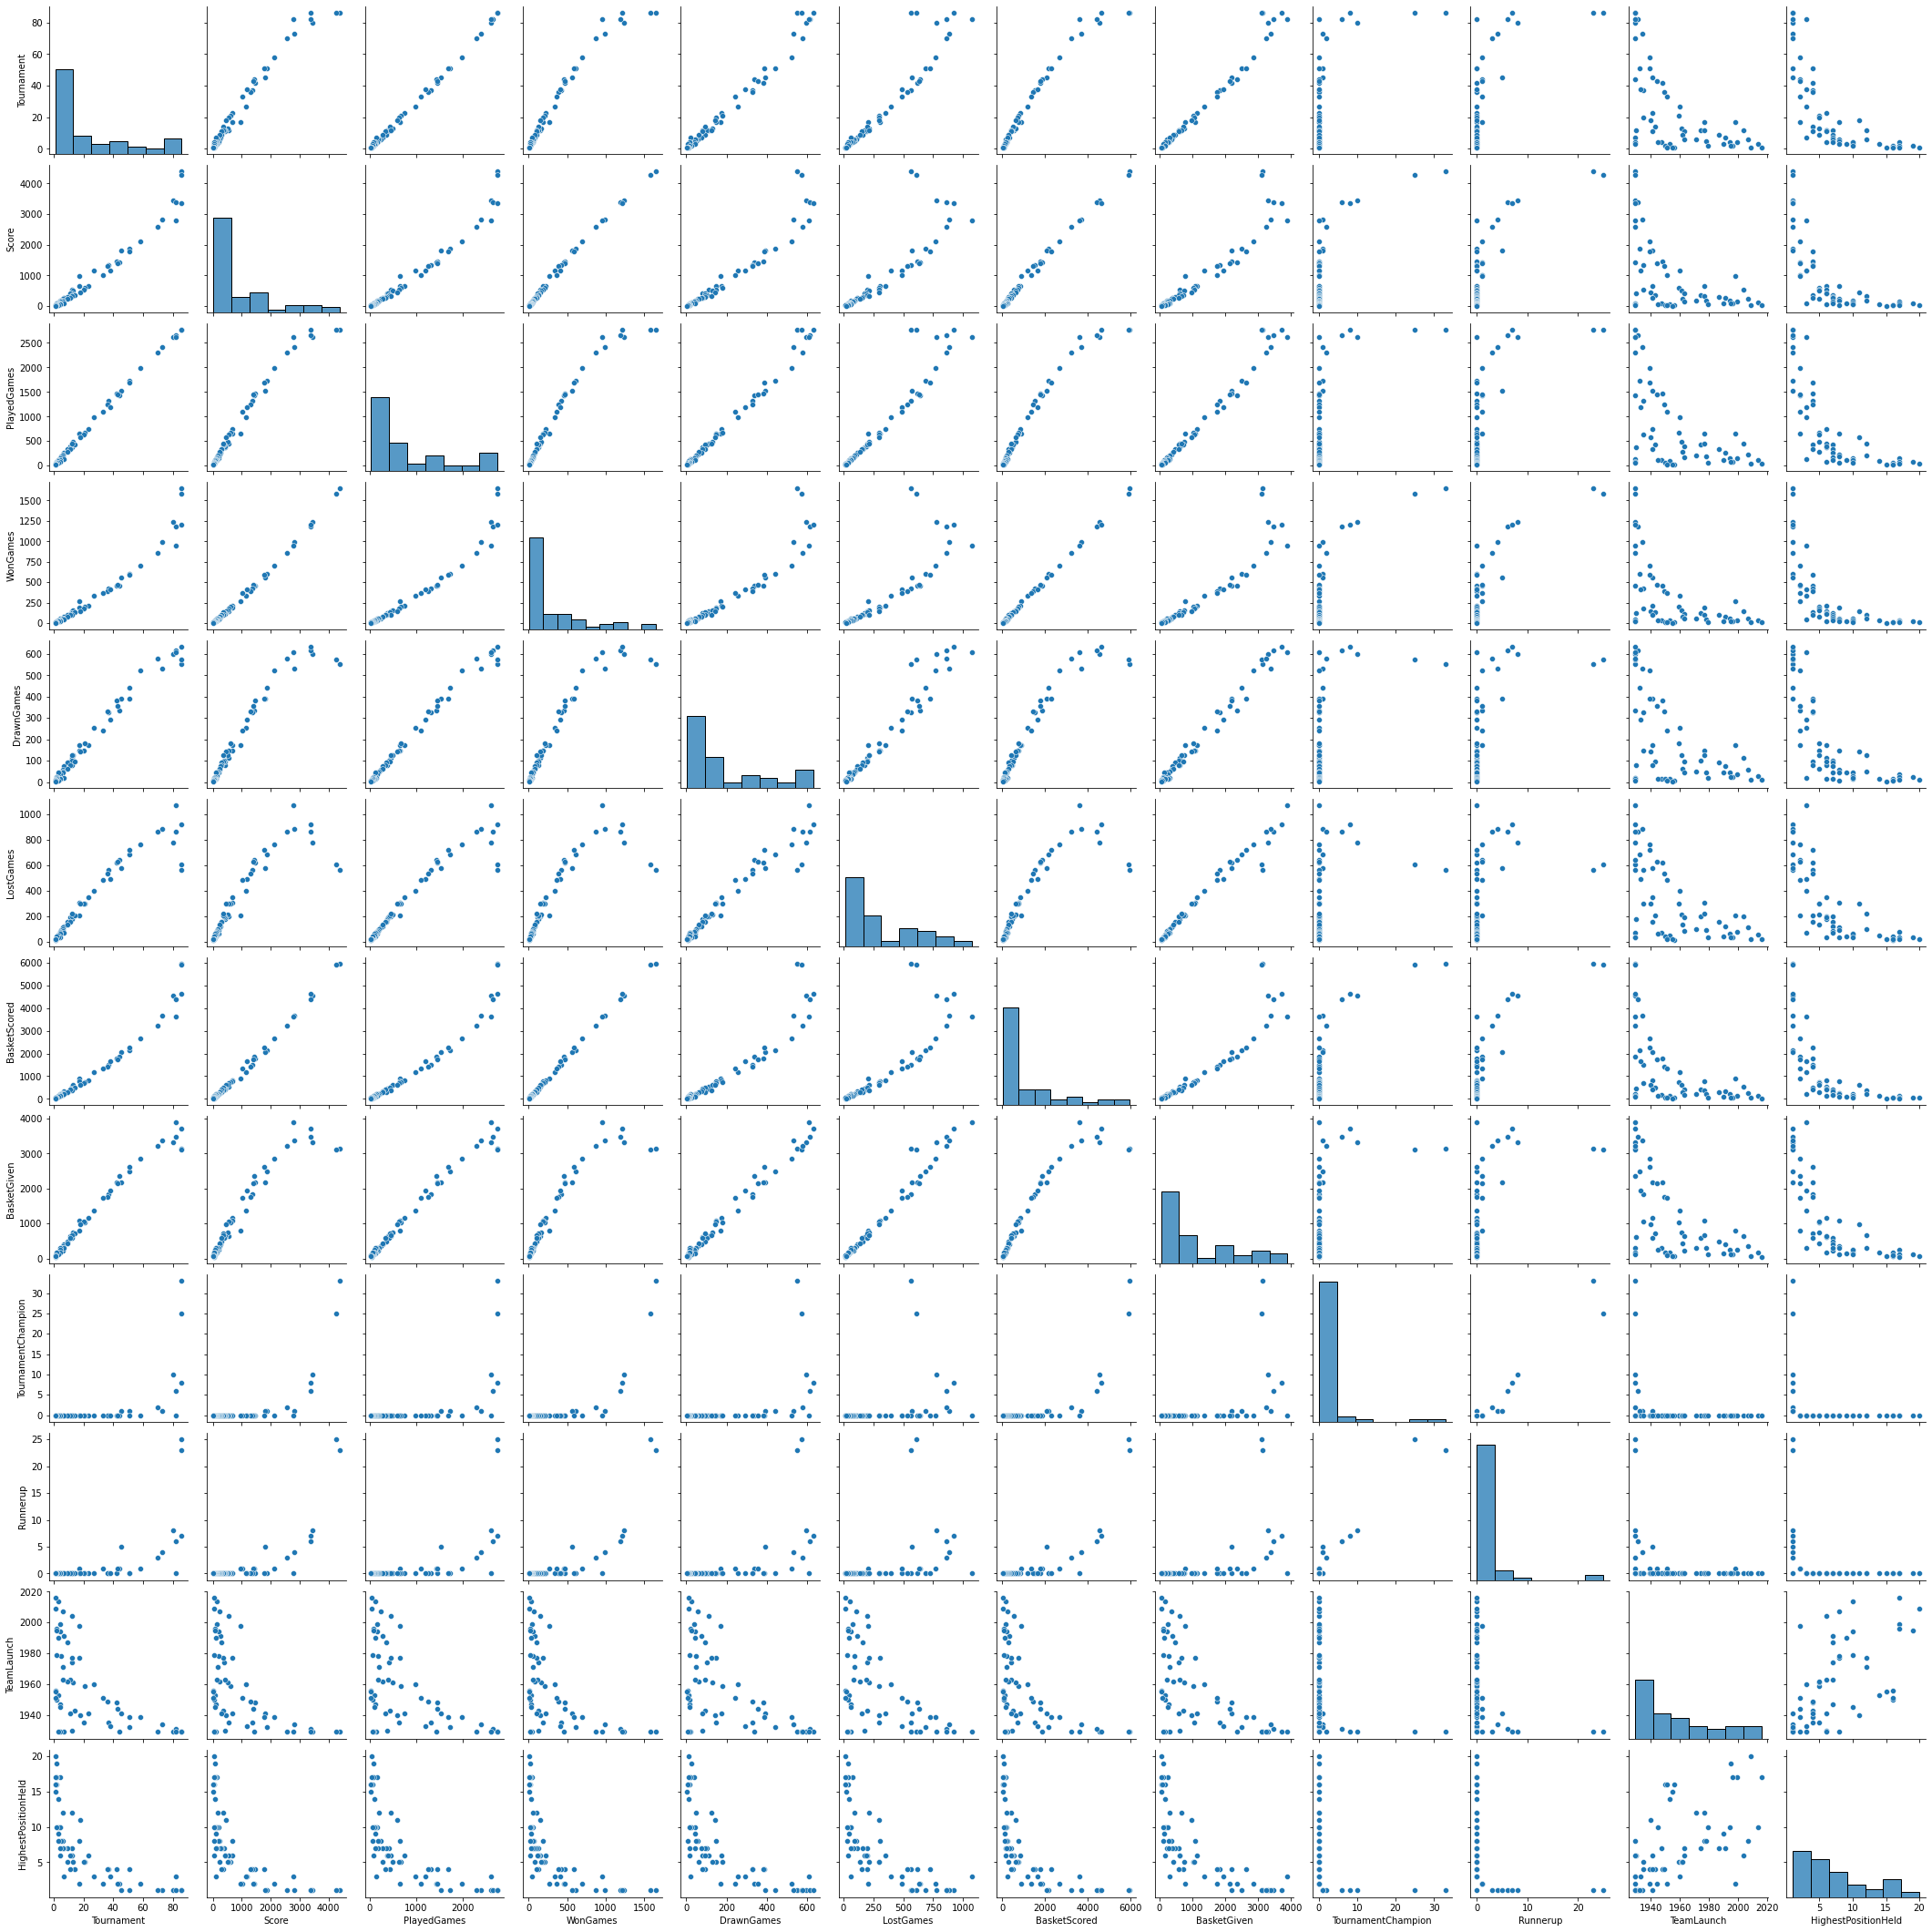

In [70]:
plt.figure(figsize=(10,5))
pairplot=sns.pairplot(df);
plt.show()

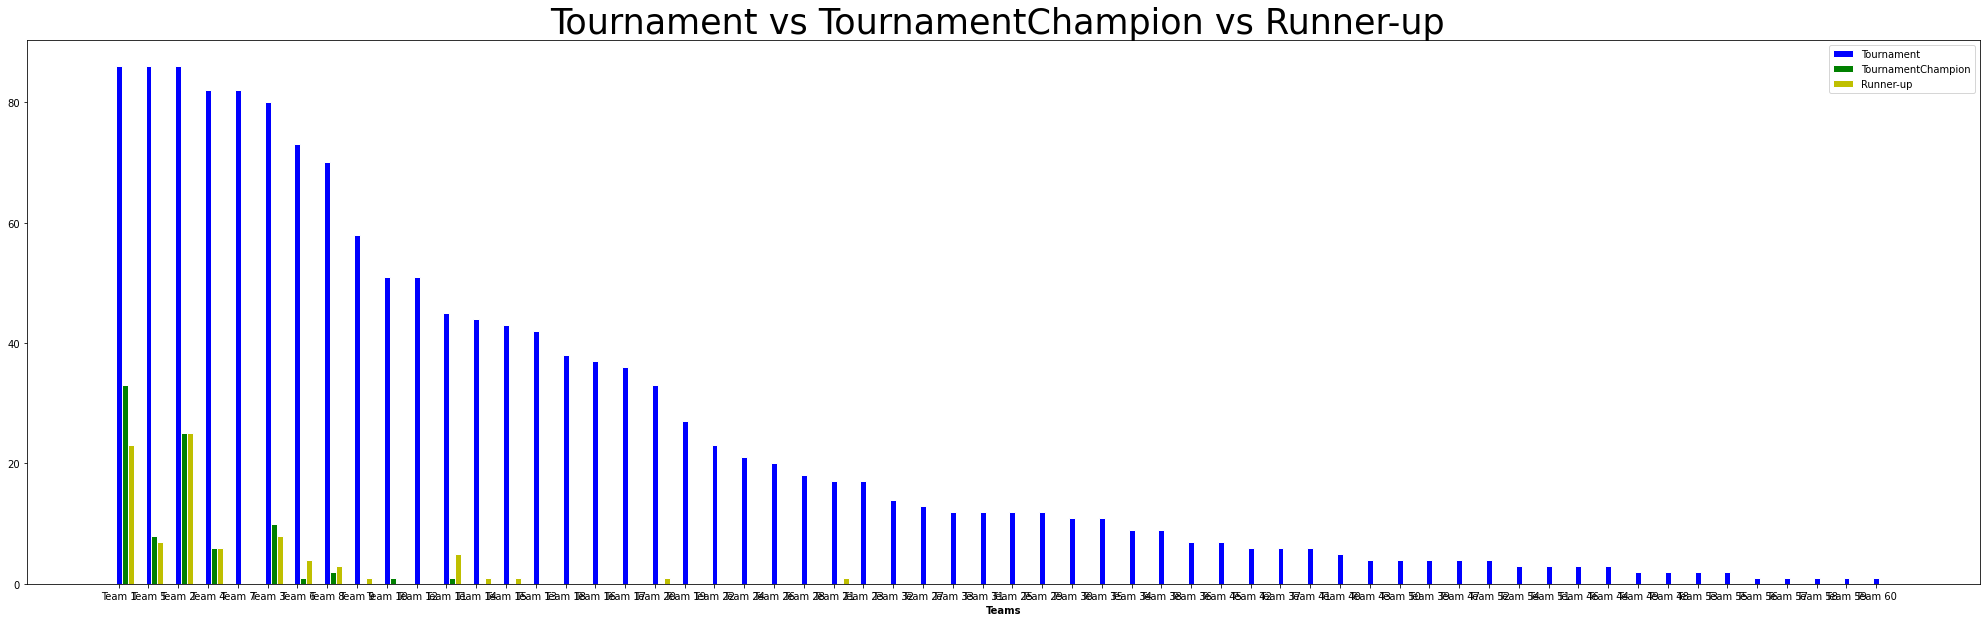

In [77]:
SortedDf=df.sort_values('Tournament',ascending=False);
plt.figure(figsize=(35,10))
# set height of bar
bars1 = SortedDf.Tournament
bars2 = SortedDf.TournamentChampion
bars3 = SortedDf.Runnerup
 # set width of bar
barWidth =  .2
# Set position of bar on X axis
r1 = np.arange(len(bars1))+barWidth
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
# Make the plotax
plt.bar(r1, bars1, color='b', width=barWidth, edgecolor='white', label='Tournament')
plt.bar(r2, bars2, color='g', width=barWidth, edgecolor='white', label='TournamentChampion')
plt.bar(r3, bars3, color='y', width=barWidth, edgecolor='white', label='Runner-up')
# Add xticks on the middle of the group bars
plt.xlabel('Teams', fontweight='bold')
plt.xticks([r + (barWidth) for r in range(len(bars1))], SortedDf.Team)
plt.title("Tournament vs TournamentChampion vs Runner-up ",size=35);
# Create legend & Show graphic
plt.legend()
plt.show()

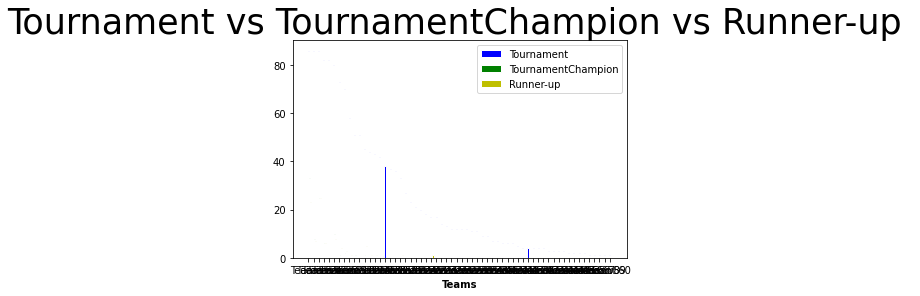

Observation : 
    We observe that T1 to T8 teams participated in more tournments . Eventhough T7 played many tournment it did nt come first 2 places any time.
T1 ,T2 and T5 played same number of tournaments but results are good as T1 >T2>T5
T11 appered for less tournments but it showed good results compared to few other teams.
T20, and T21 are participated in less torenments but they stood in second places in few tournments.
There are many teams played in tournments but didnt come in first two places.

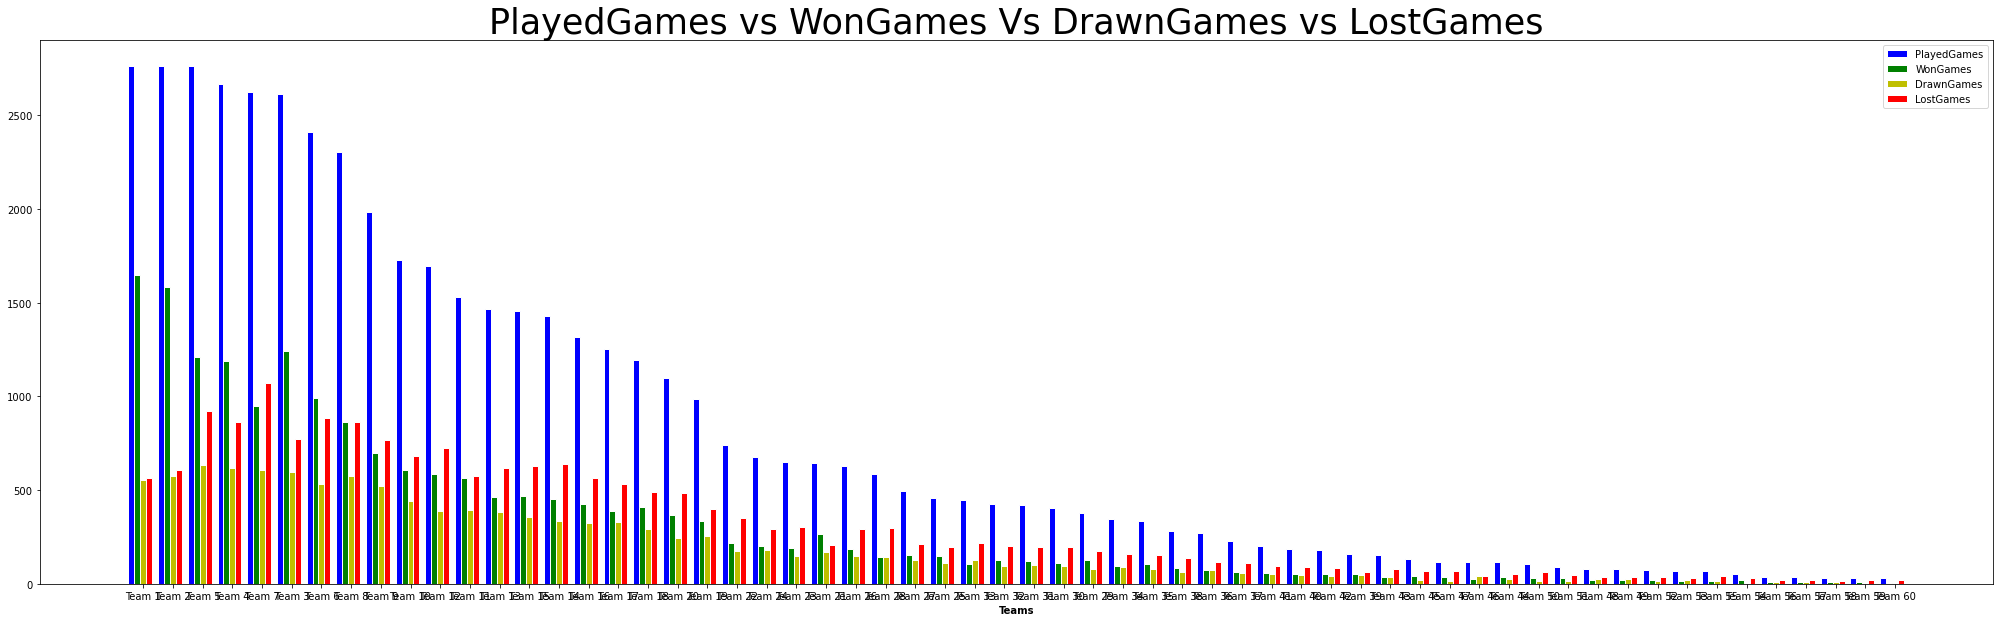

In [79]:
SortedDf=df.sort_values('PlayedGames',ascending=False);
  
plt.figure(figsize=(35,10))
# set height of bar
bars1 = SortedDf.PlayedGames
bars2 = SortedDf.WonGames
bars3 = SortedDf.DrawnGames
bars4 = SortedDf.LostGames
 # set width of bar
    
barWidth =  0.2
# Set position of bar on X axis
r1 = np.arange(len(bars1))+barWidth
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
# Make the plotax
plt.bar(r1, bars1, color='b', width=barWidth, edgecolor='white', label='PlayedGames')
plt.bar(r2, bars2, color='g', width=barWidth, edgecolor='white', label='WonGames')
plt.bar(r3, bars3, color='y', width=barWidth, edgecolor='white', label='DrawnGames')
plt.bar(r4, bars4, color='r', width=barWidth, edgecolor='white', label='LostGames')
# Add xticks on the middle of the group bars
plt.xlabel('Teams', fontweight='bold')
plt.xticks([r + (3*barWidth) for r in range(len(bars1))], SortedDf.Team)
plt.title("PlayedGames vs WonGames Vs DrawnGames vs LostGames",size=35)
# Create legend & Show graphic
plt.legend()
plt.show()

Observation :
As Tournment Chamion and Won games has perfect poistive correlation, all the observation from Tournment graphs are same withPlayed Games .
Team3 showing best retults after T1,T2. 

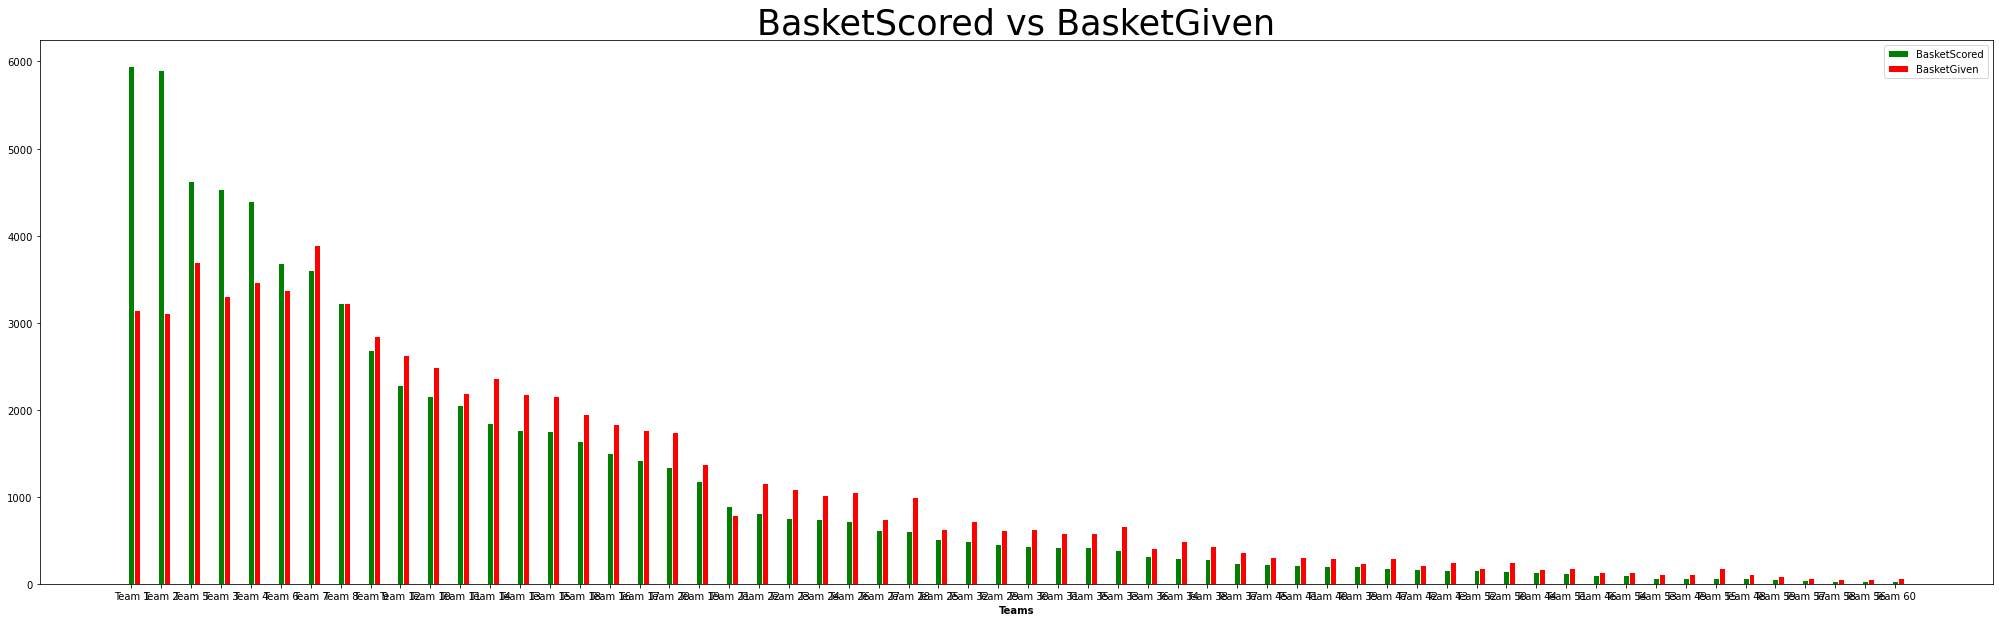

In [80]:
SortedDf=df.sort_values('BasketScored',ascending=False);
  
plt.figure(figsize=(35,10))
# set height of bar
bars1 = SortedDf.BasketScored
bars2 = SortedDf.BasketGiven

 # set width of bar
barWidth =  0.2
# Set position of bar on X axis
r1 = np.arange(len(bars1))+barWidth
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

# Make the plotax
plt.bar(r1, bars1, color='g', width=barWidth, edgecolor='white', label='BasketScored')
plt.bar(r2, bars2, color='r', width=barWidth, edgecolor='white', label='BasketGiven')

# Add xticks on the middle of the group bars
plt.xlabel('Teams', fontweight='bold')
plt.xticks([r + (barWidth) for r in range(len(bars1))], SortedDf.Team)
plt.title("BasketScored vs BasketGiven",size=35)
# Create legend & Show graphic
plt.legend()
plt.show()

Observation:
most of the teams BaskedGiven > Baskets scored.
Only T1,T2,T5,T3,T4,T6, T21 has more baskets scored compared to Baskets given. T8 has equal proportion. 

# Performance Matrix

In [83]:
cor_matrix = df.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool_))
upper_tri

Tournament     Score  PlayedGames  WonGames  DrawnGames  \
Tournament                  NaN  0.981258     0.998683  0.971749    0.989295   
Score                       NaN       NaN     0.979687  0.997232    0.958090   
PlayedGames                 NaN       NaN          NaN  0.967486    0.993972   
WonGames                    NaN       NaN          NaN       NaN    0.939416   
DrawnGames                  NaN       NaN          NaN       NaN         NaN   
LostGames                   NaN       NaN          NaN       NaN         NaN   
BasketScored                NaN       NaN          NaN       NaN         NaN   
BasketGiven                 NaN       NaN          NaN       NaN         NaN   
TournamentChampion          NaN       NaN          NaN       NaN         NaN   
Runnerup                    NaN       NaN          NaN       NaN         NaN   
TeamLaunch                  NaN       NaN          NaN       NaN         NaN   
HighestPositionHeld         NaN       NaN          NaN       NaN         NaN   

                     LostGames  BasketScored  BasketGiven  TournamentChampion  \
Tournament            0.949350      0.974867     0.987781            0.589304   
Score                 0.878780      0.996634     0.943801            0.715014   
PlayedGames           0.955925      0.969970     0.990020            0.575072   
WonGames              0.851436      0.999312     0.925745            0.752904   
DrawnGames            0.972786      0.942234     0.992479            0.503378   
LostGames                  NaN      0.857843     0.985041            0.324025   
BasketScored               NaN           NaN     0.931079            0.743847   
BasketGiven                NaN           NaN          NaN            0.471618   
TournamentChampion         NaN           NaN          NaN                 NaN   
Runnerup                   NaN           NaN          NaN                 NaN   
TeamLaunch                 NaN           NaN          NaN                 NaN   
HighestPositionHeld        NaN           NaN          NaN                 NaN   

                     Runnerup  TeamLaunch  HighestPositionHeld  
Tournament           0.645924    0.599166             0.708002  
Score                0.764819    0.538542             0.669215  
PlayedGames          0.633101    0.581243             0.711065  
WonGames             0.797849    0.540421             0.647819  
DrawnGames           0.566021    0.570175             0.720248  
LostGames            0.391645    0.591571             0.726172  
BasketScored         0.791041    0.550150             0.648672  
BasketGiven          0.533448    0.608902             0.727323  
TournamentChampion   0.971533    0.286768             0.304307  
Runnerup                  NaN    0.317250             0.359191  
TeamLaunch                NaN         NaN             0.599679  
HighestPositionHeld       NaN         NaN                  NaN

In [85]:
performaceMatrix=df[['Team','TeamLaunch','TeamLaunchCategory','PlayedGames','HighestPositionHeld']]
performaceMatrix['win']=round((df.WonGames/ df.PlayedGames)*100,2)
performaceMatrix['Drawn']=round((df.DrawnGames/ df.PlayedGames)*100,2)
performaceMatrix['Lost']=round((df.LostGames/ df.PlayedGames)*100,2)
performaceMatrix['TChampionship']=round((df.TournamentChampion/ df.Tournament)*100,2)
performaceMatrix['TRunnerup']=round((df.Runnerup/ df.Tournament)*100,2)

performaceMatrix.describe()

/var/folders/7p/5k1s0qxj2mn1kmk2d_npxq8r0000gn/T/ipykernel_9288/3067496624.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  performaceMatrix['win']=round((df.WonGames/ df.PlayedGames)*100,2)
/var/folders/7p/5k1s0qxj2mn1kmk2d_npxq8r0000gn/T/ipykernel_9288/3067496624.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  performaceMatrix['Drawn']=round((df.DrawnGames/ df.PlayedGames)*100,2)
/var/folders/7p/5k1s0qxj2mn1kmk2d_npxq8r0000gn/T/ipykernel_9288/3067496624.py:4: SettingWithCopyWarning: 
A value is try

TeamLaunch  PlayedGames  HighestPositionHeld        win      Drawn  \
count    60.000000    60.000000            60.000000  60.000000  60.000000   
mean   1957.950000   810.100000             7.050000  31.364667  23.617167   
std      26.646732   877.465393             5.315232   7.831421   4.459405   
min    1929.000000    30.000000             1.000000  16.670000  11.110000   
25%    1934.750000   115.500000             3.000000  27.610000  22.330000   
50%    1950.500000   424.500000             6.000000  30.490000  24.370000   
75%    1977.250000  1345.500000            10.000000  33.542500  26.212500   
max    2016.000000  2762.000000            20.000000  59.630000  38.600000   

            Lost  TChampionship  TRunnerup  
count  60.000000      60.000000  60.000000  
mean   44.992167       1.749500   1.956333  
std     8.401111       6.442478   5.491846  
min    20.380000       0.000000   0.000000  
25%    41.147500       0.000000   0.000000  
50%    45.725000       0.000000   0.000000  
75%    48.542500       0.000000   0.000000  
max    70.000000      38.370000  29.070000

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

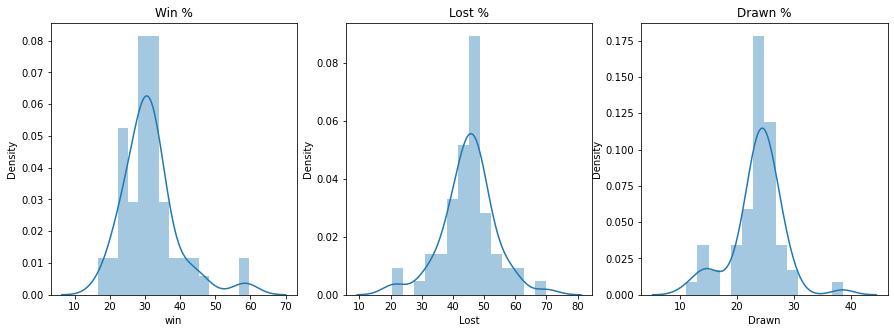

In [86]:
fig, ax = plt.subplots(1, 3)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.distplot(performaceMatrix['win'], ax = ax[0])
sns.distplot(performaceMatrix['Lost'], ax = ax[1])
sns.distplot(performaceMatrix['Drawn'], ax = ax[2])

ax[0].set_title('Win %')
ax[1].set_title('Lost %')
ax[2].set_title('Drawn %')
plt.show()

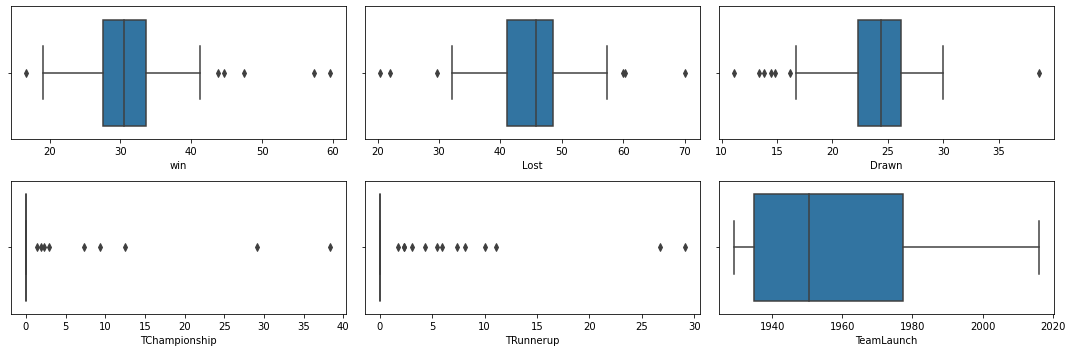

In [87]:
fig, ax = plt.subplots(2, 3)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.boxplot(x=performaceMatrix['win'],ax=ax[0][0]);
sns.boxplot(x=performaceMatrix['Lost'],ax=ax[0][1]);
sns.boxplot(x=performaceMatrix['Drawn'],ax=ax[0][2]);
sns.boxplot(x=performaceMatrix['TChampionship'],ax=ax[1][0]);
sns.boxplot(x=performaceMatrix['TRunnerup'],ax=ax[1][1]);
sns.boxplot(x=performaceMatrix['TeamLaunch'],ax=ax[1][2]);


fig.tight_layout() 
plt.show()

Finding Outliers using Z score

In [88]:
df = performaceMatrix[['win','Drawn','Lost']];

z = np.abs(stats.zscore(df))  # get the z-score of every value with respect to their columns
threshold = 3
np.where(z > threshold)
performaceMatrix.iloc[[0,1,45,59]]

Team  TeamLaunch TeamLaunchCategory  PlayedGames  HighestPositionHeld  \
0    Team 1        1929            VeryOld         2762                    1   
1    Team 2        1929            VeryOld         2762                    1   
45  Team 46        1990            VeryNew          114                    9   
59  Team 60        1955                New           30                   15   

      win  Drawn   Lost  TChampionship  TRunnerup  
0   59.63  19.99  20.38          38.37      26.74  
1   57.24  20.75  22.01          29.07      29.07  
45  22.81  38.60  38.60           0.00       0.00  
59  16.67  13.33  70.00           0.00       0.00

Observations:
Outliers are T1 and T2 with more win % , far from other data points .
T46 team has more drawn percentage far from data points.
T60 team has more lost percentage far from data points.

# Bivariate Anyalysis


In [90]:
SortedDf=df.sort_values('PlayedGames',ascending=False);
fig, ax = plt.subplots(figsize=(40,10))   # setting the figure size of the plot
ax.scatter(SortedDf['Team'], SortedDf['PlayedGames'])  # scatter plot
ax.set_xlabel('Team ', fontsize=18)
ax.set_ylabel('Played Games', fontsize=18)

team=np.array(SortedDf.Team);
basket=np.array(SortedDf.PlayedGames);
for i, txt in enumerate(SortedDf.TeamLaunch):
    plt.annotate(txt, (team[i], basket[i]))
plt.title("Team vs PlayedGames Annotated with TeamLaunch",size=35);
plt.show()


KeyError: 'PlayedGames'

please find below suggestions for data point collection

1.Highly correlated : The columns in the data set are highly correlated . It says that we have duplicancy of columns. So to measure performace of a team other than this duplicate columns, please check for any other points. WonGames = Basketsscored = Score

2Quality: We have incomplete team information. For example Team61. This Team dont have any information about how many games it played or about baskets . But it has highest poistion held.

3.Variety: To analyze a bastball team other then the given information , more subject related data can be added . Example: HighestPositionHeld column . Dont have target value to analyze team.

4.volume: Data set is comparing 61 teams. Having only team information would not be enough. We can increase the volumn of data set by adding players information so that we can analyze current team players and predidct which team will have more winning probability.

5.Missing information: We have Team Launch information , it has the data which shows that team is very old team. But dont know what kind of players we have in that team now to analyze performance about the team.

6.OutDated information check: We have few old teams Team54,Team52 who played very less games , it is even less than new teams. So is this team still active and participating in any tournmaments ?

7.Veracity: Our data set is small , it has out liers and missing information . With these , Eventually it effects the reliability of its results.

8.Team wise data prediction may vary because it will be based on players . So vbetter we gather information about teams and its players too.

9.Incomplete data: The data in HighestPositionHeld column is not complete , it is just showing the highest position but dont know how mant times it got that poistion and all

10.We can add more identifiers to data about team .more identifiers will help us to analyze teams accurately.